[ES]

Primero se realizará un análisis exploratorio de los datos para determinar el nivel de limpieza y preprocesamiento requeridos.

[EN]

First, an exploratory data analysis will be performed to determine the level of cleaning and preprocessing required.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("housing.csv")
df

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


[ES]

Como se puede observar, el DataFrame no se visualiza de forma adecuada. Esto ocurre porque el archivo CSV utiliza espacios en blanco como separador. Para solucionar este problema, podemos utilizar el parámetro 'delim_whitespace=True' del método 'read_csv', que indica que cualquier tipo de espacio en blanco se utilizará como delimitador.

Se puede apreciar que el DataFrame no tiene encabezados. Tras revisar la información de la fuente del DataSet (https://www.kaggle.com/datasets/vikrishnan/boston-house-prices), encontramos descripciones para las columnas, las cuales utilizaremos.

[EN]

As you can see, the DataFrame is not displayes properly. This happens because the CSV file uses whitespace as a separator. To solve this problem, we can use the 'delim_whitespace=True' parameter of the 'read_csv' method, which indicates that any type of whitespace will be used as delimiter.

You can see that the DataFrame has no headers. After reviewing the DataSet source information (https://www.kaggle.com/datasets/vikrishnan/boston-house-prices), we find descriptions for the columns, which we will use.

In [18]:
df = pd.read_csv('housing.csv', delim_whitespace=True)
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = column_names
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [19]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


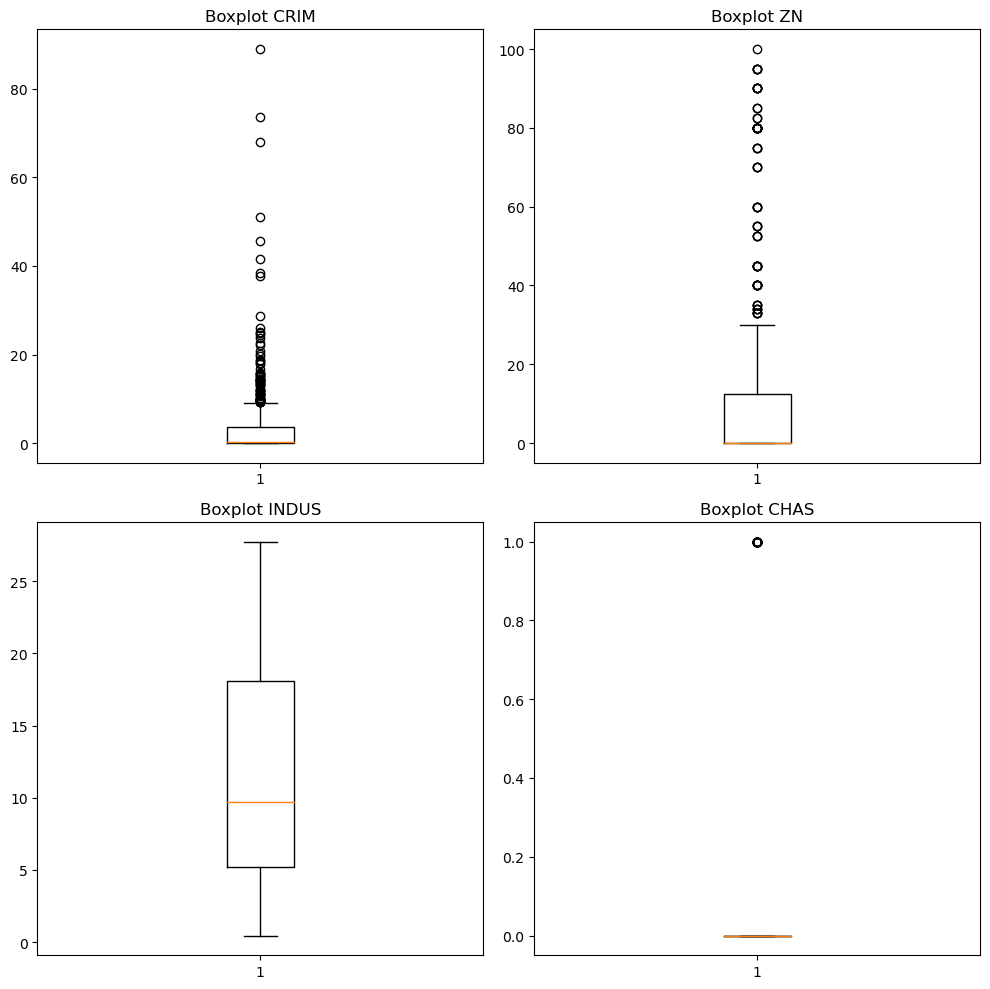

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].boxplot(df.CRIM)
axs[0, 0].set_title('Boxplot CRIM')

axs[0, 1].boxplot(df.ZN)
axs[0, 1].set_title('Boxplot ZN')

axs[1, 0].boxplot(df.INDUS)
axs[1, 0].set_title('Boxplot INDUS')

axs[1, 1].boxplot(df.CHAS)
axs[1, 1].set_title('Boxplot CHAS')

plt.tight_layout()
plt.show()

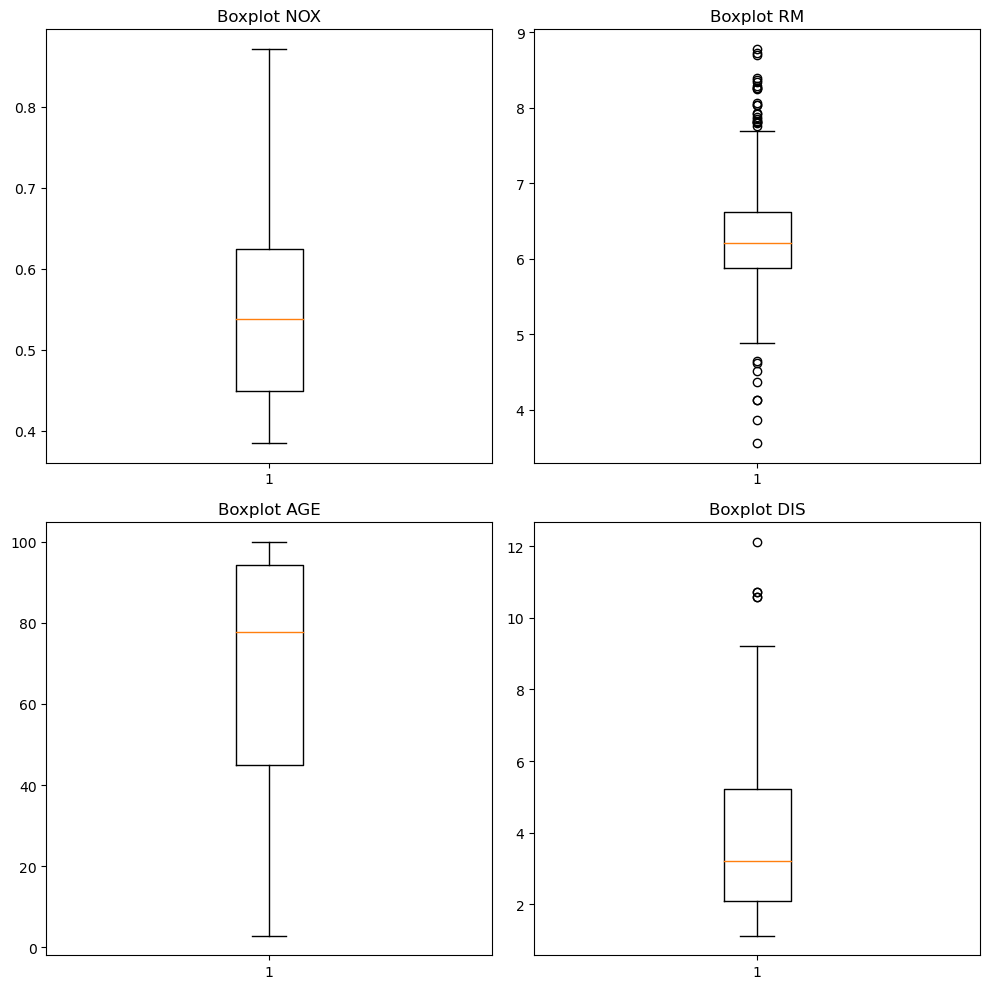

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].boxplot(df.NOX)
axs[0, 0].set_title('Boxplot NOX')

axs[0, 1].boxplot(df.RM)
axs[0, 1].set_title('Boxplot RM')

axs[1, 0].boxplot(df.AGE)
axs[1, 0].set_title('Boxplot AGE')

axs[1, 1].boxplot(df.DIS)
axs[1, 1].set_title('Boxplot DIS')

plt.tight_layout()
plt.show()